<a href="https://colab.research.google.com/github/pavleens/Netflix-social-media-analysis-python/blob/main/Group_5_Social_Media_Analysis_Project_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Social Media Analysis Project

Team 5:
- Janhavee Mandrekar
- Oiza Jagun
- Pavleen Singh

# Preliminary Analysis

## 1. What are the ten most popular words with and without stop words?

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [ ]:
!pip3 install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### With Stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


rt @tngtweets1: squid game creator hwang dong-hyuk wrote the show in 2009 but was rejected by studios for 10 years.

he once had to stop
['RT', '@Tngtweets1:', 'Squid', 'Game', 'creator', 'Hwang', 'Dong-hyuk', 'wrote', 'the', 'show', 'in', '2009', 'but', 'was', 'rejected', 'by', 'studios', 'for', '10', 'years.', 'He', 'once', 'had', 'to', 'stop']
83130
<class 'list'>
Ten most popular words with stopwords: 
[('rt', 3989), ('the', 2458), ('to', 1822), ('&amp;', 1411), ('in', 1390), ('are', 1367), ('@netflix:', 1326), ('when', 1307), ('for', 1290), ('facebook', 1278)]



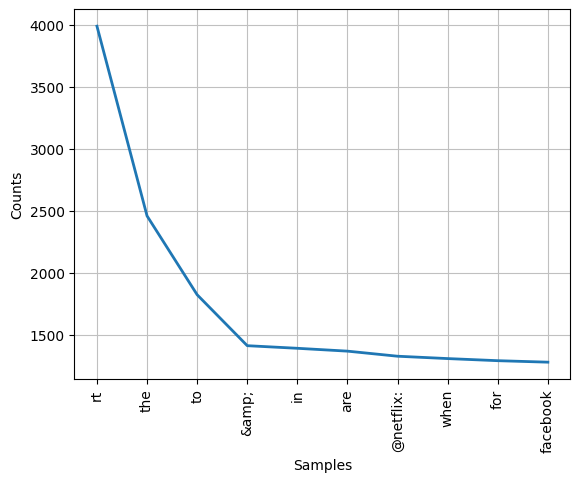

In [ ]:
# supressing scientific notations (e.g., 1.2*10e-10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#path = '/content/drive/MyDrive/Social Media Analysis Project (1)/tweets_netflix_5000.csv'
path = '/content/drive/MyDrive/UBC/Reading/MBA - P2/BA_V 515 002 2024W1 Fundamentals of Analytics and Tech/Social Media Analysis Project/tweets_netflix_5000.csv'

# read csv file as a dataframe
df = pd.read_csv(path)

tweet_list = list(df['tweet_text'])

# str's lower() method
print(tweet_list[0].lower())

# str's split() method
# split a string into a list of tokens
print(tweet_list[0].split())

# accumulator for loop pattern
# this code will accumulate all the split words from the 3000 tweet texts
word_list = []
for t in tweet_list:
    word_list.extend(t.lower().split())

print(len(word_list))
print(type(word_list))

#ten most popular words with stopwords
from collections import Counter

c = Counter(word_list)
pop_words = c.most_common(10)
print ("Ten most popular words with stopwords: \n" + str(pop_words) + "\n")

# graph of ten most popular words with stopwords
freq1 = nltk.FreqDist(word_list)
freq1.plot(10)
plt.show()

### Without Stopwords

In [ ]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Ten most popular words without stopwords: 
[('@netflix:', 1326), ('facebook', 1278), ('instagram', 1236), ('down.', 1217), ('https://t.co/mvflvoococ', 1215), ('netflix', 1035), ('squid', 1016), ('show', 1005), ('game', 1001), ('rejected', 937)]



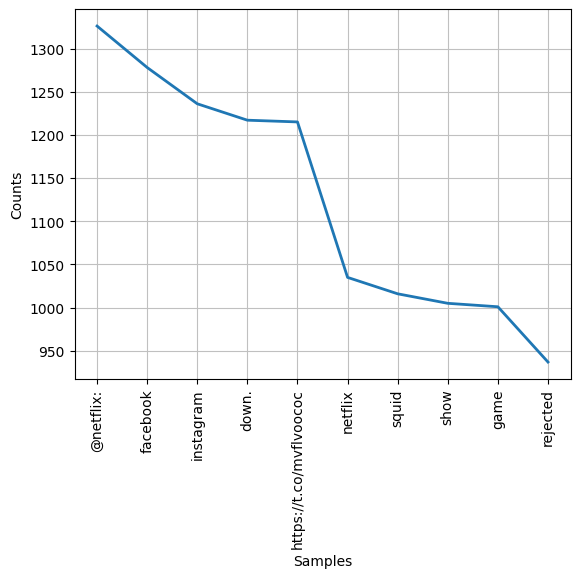

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

# this code will accumulate word
word_list2 = [] # our accumulator list

#remove stopwords
for word in word_list:
    if word not in stopwords and len(word) > 1 and word != 'rt' and word != '&amp;':
        word_list2.append(word)

#ten most popular words without stopwords
popwords_no_stop = Counter(word_list2).most_common(10)
print ("Ten most popular words without stopwords: \n" + str(popwords_no_stop) + "\n")

# graph of ten most popular words without stopwords
freq2 = nltk.FreqDist(word_list2)
freq2.plot(10)
plt.show()

## 2. What are the ten most popular hashtags (#hashtag)?

Ten most popular hashtags: 
[('#escapetheundertaker', 85), ('#wwechampion', 84), ('#netflix', 47), ('#', 42), ('#ticktickboommovie.', 25), ('#squidgame', 25), ('#jisoo', 18), ('#zonauang', 13), ('#1', 13), ('#hometownchachacha', 12)]



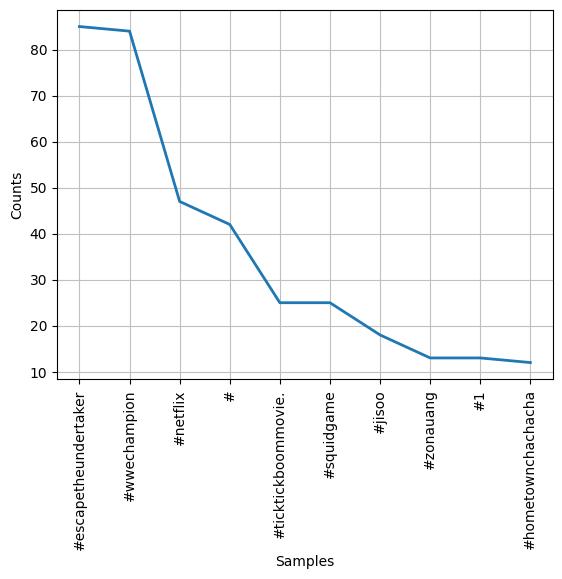

In [ ]:
# this code will accumulate word
word_list3 = [] # our accumulator list

for word in word_list:
    if word.startswith('#'):
        word_list3.append(word)

#ten most popular hashtags
pophash = Counter(word_list3).most_common(10)
print ("Ten most popular hashtags: \n" + str(pophash) + "\n")

# graph of ten most popular hashtags
freq3 = nltk.FreqDist(word_list3)
freq3.plot(10)
plt.show()

## 3. What are the ten most frequently mentioned usernames (@username)?

Ten most frequently mentioned usernames: 
[('@netflix:', 1326), ('@tngtweets1:', 872), ('@ifetalksback:', 252), ('@netflix', 230), ('@austincreedwins', 101), ('@netflix,', 97), ('@keyon:', 92), ('@wwe:', 87), ('@truekofi,', 84), ('@supremedreams_1:', 82)]



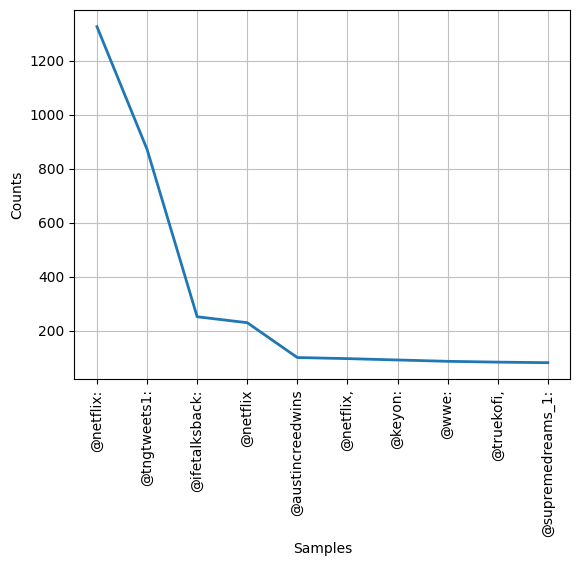

In [ ]:
# this code will accumulate word
word_list4 = [] # our accumulator list


for word in word_list:
    if word.startswith('@'):
        word_list4.append(word)

#ten most frequently mentioned usernames
popuser = Counter(word_list4).most_common(10)
print ("Ten most frequently mentioned usernames: \n" + str(popuser) + "\n")

# graph of ten most frequently mentioned usernames
freq4 = nltk.FreqDist(word_list4)
freq4.plot(10)
plt.show()

## 4. Who is the vocal user on the keyword? In other words, who is the most frequently tweeting person (tweet author) on the keyword in the collected data?

In [ ]:
#The most vocal user
name_freq = (df['user_screen_name'].value_counts().head(1))
print ("The most vocal user:\n" + str(name_freq))

The most vocal user:
user_screen_name
batamerra    15
Name: count, dtype: int64


## 5. Who is the most influential user?

In [ ]:
# create a copy of the dataframe with filtered retweets

dfc = df[df['is_retweet'] == True].copy()


#create a new user influence by adding four columns
dfc['user_influence'] = dfc['source_user_followers_count'] + dfc['source_user_friends_count'] + dfc['source_user_listed_count'] + dfc['source_user_favourites_count']

#the most influential user
print ("The most influential user is darellcapero\n")

dfc.sort_values('user_influence', ascending=False).head(1)

The most influential user is darellcapero



,Unnamed: 0,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,...,source_user_favourites_count,source_tweet_created_at,source_tweet_id,source_tweet_source,source_tweet_lang,source_tweet_quote_count,source_tweet_reply_count,source_tweet_retweet_count,source_tweet_favorite_count,user_influence
3205,3205,RT @elonmusk: Amazing show about @Inspiration4...,darellcapero,Darell,"Iloilo City, Western Visayas",61,173,0,665,Tue Oct 05 01:00:38 +0000 2021,...,10327.00,Sat Oct 02 22:08:38 +0000 2021,1444424110961041408.00,"<a href=""http://twitter.com/download/iphone"" r...",en,305.00,4719.00,3933.00,42555.00,60520619.00


## 6. Which is the most influential retweet?

In [ ]:
# create a copy of the dataframe with filtered retweets

dfc = df[df['is_retweet'] == True].copy()


#create a new retweet influence column by adding four columns
dfc['retweet_influence'] = dfc['source_tweet_quote_count'] + dfc['source_tweet_reply_count'] + dfc['source_tweet_retweet_count'] + dfc['source_tweet_favorite_count']

print ("The most influential retweet:\n")

dfc.sort_values('retweet_influence', ascending=False).head(1)

The most influential retweet:



,Unnamed: 0,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,...,source_user_favourites_count,source_tweet_created_at,source_tweet_id,source_tweet_source,source_tweet_lang,source_tweet_quote_count,source_tweet_reply_count,source_tweet_retweet_count,source_tweet_favorite_count,retweet_influence
4991,4991,RT @netflix: When Instagram &amp; Facebook are...,Gabialejandra94,Gabriela Guevara,Venezuela,193,474,3,55767,Tue Oct 05 01:07:18 +0000 2021,...,14884.00,Mon Oct 04 16:20:02 +0000 2021,1445061159158042624.00,"<a href=""https://about.twitter.com/products/tw...",en,9415.00,3292.00,115949.00,464987.00,593643.00


# Word Cloud

In [ ]:
# you need to install nltk only once
# once you installed, you don't need to execute this code again.
#!pip3 install wordcloud
# or
!conda install -c conda-forge wordcloud

/bin/bash: line 1: conda: command not found


In [ ]:
# import necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [ ]:
# read csv file as a dataframe
df = pd.read_csv(path)

tweet_list = list(df['tweet_text'])

In [ ]:
# this code will accumulte all the strings into a long string
tweet_long_string = ''
for t in tweet_list:
    tweet_long_string = tweet_long_string + ' ' + t

In [ ]:
print(len(tweet_long_string))
print(len(tweet_long_string.split()))

526692
83130


### With Stopwords

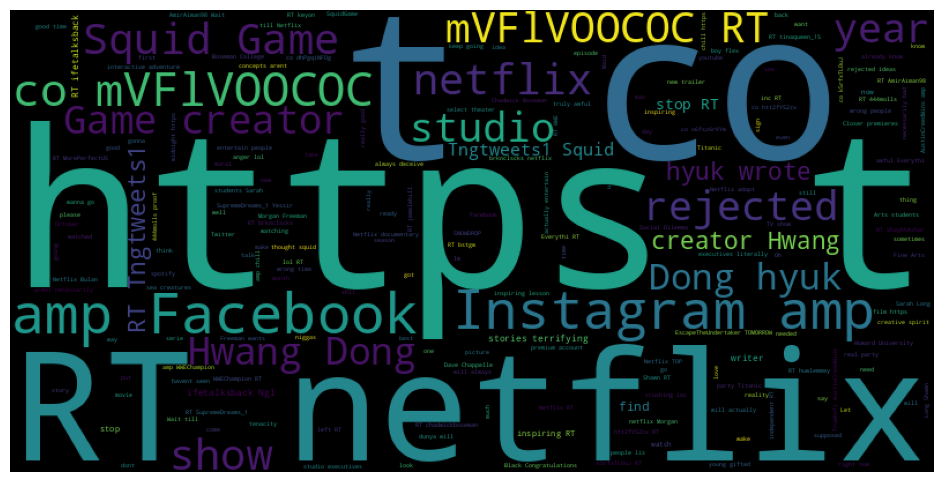

In [ ]:
 # lower max_font_size
wordcloud = WordCloud(width=800, height=400).generate(tweet_long_string) # note that text is a string, not a list

# Display the generated image:
plt.figure(figsize=(12,6)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("off") # turn on axis
plt.savefig('my_word_cloud.png') # save as PNG file
plt.savefig('my_word_cloud.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook

### Without Stopwords

In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

#add some words to the stopwords list
stopadd = ['https', 't', 'co', 'RT', 'rt', 'amp', 'h t t p s', 'c o', ' t', 'CO', '&', '&amp', 'http']

stopwords.extend(stopadd)

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

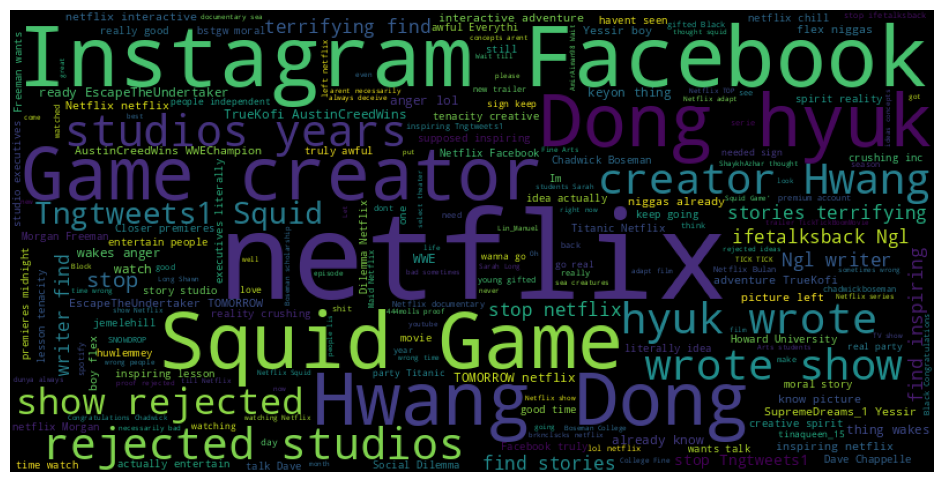

In [ ]:
#remove stopwords

text2 = '' # our string accumulator
for word in tweet_long_string.split():
    if len(word) == 1 or word in stopwords or word.startswith('https') or word.startswith('&amp'):
        continue
    text2 = text2 + ' ' + word


wordcloud2 = WordCloud(width=800, height=400).generate(text2)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud2)
plt.savefig('my_word_cloud_nostop.png') # save as PNG file
plt.savefig('my_word_cloud_nostop.pdf') # save as PDF file
plt.axis('off')
plt.show()

#Sentiment Analysis

## 1. What are the average polarity and subjectivity scores?

In [ ]:
!pip3 install textblob

In [ ]:
from textblob import TextBlob
import statistics

In [ ]:
tweet_list = list(df['tweet_text'])

sub_list = []
pol_list = []

for s in tweet_list:
    tb = TextBlob(s)
    sub_list.append(tb.sentiment.subjectivity)
    pol_list.append(tb.sentiment.polarity)

sub_list_avg = statistics.mean(sub_list)
pol_list_avg = statistics.mean(pol_list)

print("The average subjectivity score is: " + str(sub_list_avg))
print("The average polarity score is: " + str(pol_list_avg))

The average subjectivity score is: 0.369196509475247
The average polarity score is: -0.063084771027448


## 2. Visualize the polarity and subjectivity score distributions using histograms

Histogram showing subjectivity score distributions 



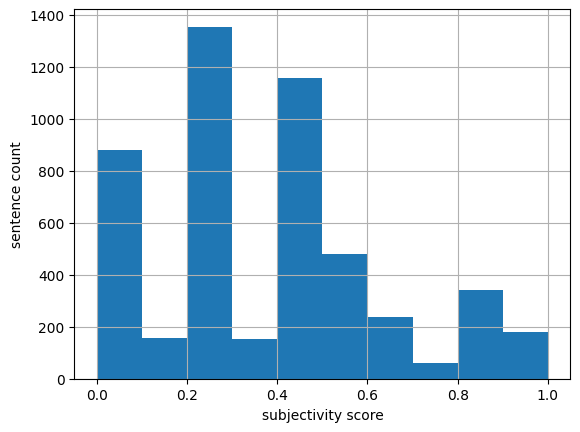

In [ ]:
import matplotlib.pyplot as plt

print ("Histogram showing subjectivity score distributions \n")

plt.hist(sub_list, bins=10) #, normed=1, alpha=0.75)

plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('subjectivity.pdf')
plt.show()

Histogram showing polarity score distributions 



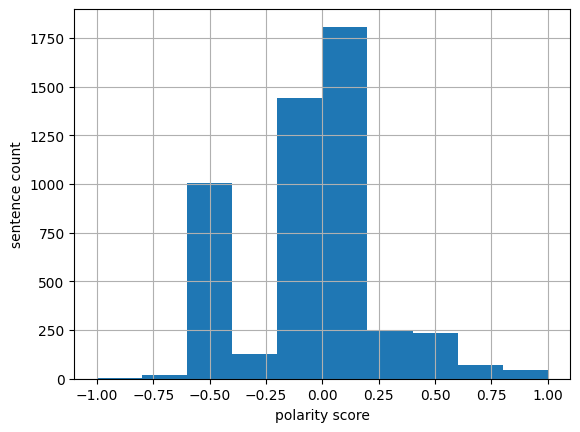

In [ ]:
import matplotlib.pyplot as plt

print ("Histogram showing polarity score distributions \n")

plt.hist(pol_list, bins=10) #, normed=1, alpha=0.75)

plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('polarity.pdf')
plt.show()

## 3. Based on the polarity scores, what are the most positive and negative tweets on the keyword? Why is the author happy/angry on the topic? If there are multiple tweets with same sentiment scores, please pick 2-3 tweets among them.

In [ ]:
count = 0

print ('Here are the first three most positive tweets: \n')

for s in tweet_list:
    tb = TextBlob(s)
    pol = tb.sentiment.polarity
    if pol == 1.0:
        print('polarity score', pol)
        print(s)
        print()
        count += 1

    if count == 3:
        break

Here are the first three most positive tweets: 

polarity score 1.0
RT @10velyhearts: This has to be the best interaction I've seen during this shitty pandemic I'm on the floor @Twitter @netflix #SquidGame

polarity score 1.0
GOLDEN WIND IS COMING TO NETFLIX!!!! AND THEN WE ARE ON THE WAY TO STONE OCEAN BABY!!!!!!!!!!!!!!!!!  https://t.co/6QVfGmCFEt

polarity score 1.0
Been watching Castlevania on Netflix and it's so good!!



In [ ]:
count = 0

print ('Here are the first three most negative tweets: \n')

for s in tweet_list:
    tb = TextBlob(s)
    pol = tb.sentiment.polarity
    if pol == -1.0:
        print('polarity score', pol)
        print(s)
        print()
        count += 1

    if count == 3:
        break

Here are the first three most negative tweets: 

polarity score -1.0
Finally my shit!!!!  Fucc squid bows or whatever its called! Watching On My Blocc via Netflix all night!!!

polarity score -1.0
Wtf i been waiting forever and now i come home to shower pop popcorn and turn on Netflix to WATCH IT! Just to find out my acct on hold!!! FML

polarity score -1.0
RT @lovblueberry90: @netflix Boring

